In [14]:
import math
import nilearn as ni
from nilearn import plotting
from nilearn import image
from nilearn.image import math_img
from nilearn.image import index_img
from nilearn.regions import connected_regions
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np


In [15]:
wm = image.load_img("wm_optimized.nii")
action = image.load_img("action_optimized.nii")
ltm = image.load_img("ltm_optimized.nii")
perception = image.load_img("perception_optimized.nii")
pm = image.load_img("procedural_optimized.nii")

IMAGES = [wm, ltm, action, pm,  perception]
NAMES = ["Working Memory", "Long-Term Memory", "Action", "Procedural", "Perception"]
COLORS = ["aqua", "orange", "darkorchid", "limegreen", "tomato"]


/home/andrea/.local/lib/python3.7/site-packages/nilearn/plotting/displays.py:103: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  # Remove the CWD from sys.path while we load stuff.


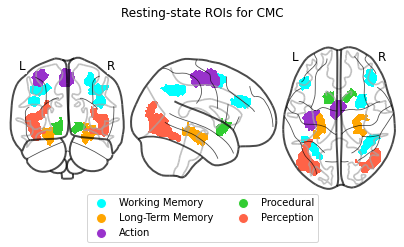

In [16]:
fig, axs = plt.subplots(1,1, figsize=(7, 3.5))
display = plotting.plot_glass_brain(None, axes=axs)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

axs.set_title("Resting-state ROIs for CMC")
fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_optimized.png", figsize=(7, 3.5))
plt.show()

In [17]:
wm_map = image.load_img("wm_map.nii")
action_map = image.load_img("motor_map.nii")
ltm_map = image.load_img("ltm_map.nii")
perception_map = image.load_img("perception_map.nii")
pm_map = image.load_img("procedural_map.nii")

IMAGES = [wm_map, ltm_map, action_map, pm_map,  perception_map]


/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  app.launch_new_instance()


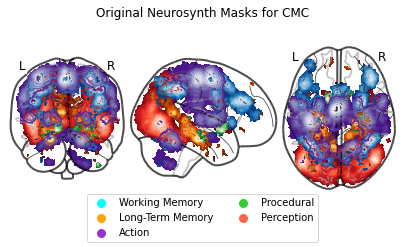

In [18]:
fig, axs = plt.subplots(1,1, figsize=(7, 3.5))
display = plotting.plot_glass_brain(None, axes=axs)
#for img, col in zip(IMAGES, COLORS):

display.add_contours(perception_map, filled=True, threshold=4, cmap="Reds_r", color=None)
display.add_contours(ltm_map, filled=True, threshold=5, cmap="YlOrBr_r")
display.add_contours(pm_map, filled=True, threshold=5, cmap="Greens_r", color="NA")
display.add_contours(wm_map, filled=True, threshold=4, cmap="Blues_r")
display.add_contours(action_map, filled=True, threshold=5, cmap="Purples_r")


handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

axs.set_title("Original Neurosynth Masks for CMC")
fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_originals.png", figsize=(7, 3.5))
plt.show()

## 3D Rendering

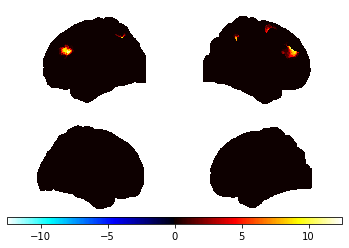

In [35]:
from nilearn import datasets
from nilearn import surface

fsaverage = datasets.fetch_surf_fsaverage()

wm_surf = surface.vol_to_surf(wm, fsaverage.pial_right)
pm_surf = surface.vol_to_surf(perception, fsaverage.pial_right)

#plotting.plot_surf_stat_map(fsaverage.infl_right, wm_surf, hemi='right',
#                            title='Working Memory', colorbar=False, cmap="Blues",
#                            threshold=1., bg_map=fsaverage.sulc_right)

plotting.plot_img_on_surf(wm,
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True)
plotting.show()